In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import riskfolio as rp
import warnings
warnings.filterwarnings("ignore")

In [2]:
tickers = pd.read_csv('yahoo_tickers.csv')['Ticker'].tolist()
tickers.remove('RDSA.L')
tickers.remove('KL.TO')
tickers.remove('ZGNX')
tickers.remove('GNDI3.SA')
tickers.remove('HNP')
tickers.remove('JRJC')

def download_data_and_calc_returns(tickers, period='5y', interval='1d', prepost=False):
    data = yf.download(tickers, period=period, interval=interval, prepost=prepost, threads=True)
    data = data.loc[:,('Adj Close', slice(None))]  # get adjusted close only
    data.columns = tickers
    data = data[tickers].pct_change().dropna()
    return data

returns = download_data_and_calc_returns(tickers)

[*********************100%***********************]  505 of 505 completed


In [3]:
returns.head()

,ABT,ABBV,ANF,ACHC,ATVI,ADBE,AMD,AMTX,AFL,AC.TO,...,WTB.L,WSM,WIPRO.BO,000858.SZ,WH,WYN.L,XRX,YESBANK.BO,YUM,ZTO
Date,,,,,,,,,,,,,,,,,,,,,
2021-04-28 05:00:00+00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2021-04-28 16:00:00+00:00,0.007587,0.023053,0.013655,0.002135,-0.004383,0.018657,0.030965,0.005573,-0.003188,-0.012403,...,0.000000,0.000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2021-04-28 18:30:00+00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000,0.0,0.0,0.0,-0.016892,0.0,0.0,0.0,0.0
2021-04-28 23:00:00+00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.012066,-0.022,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2021-04-29 03:00:00+00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [4]:
port = rp.Portfolio(returns=returns, lowerret=(pow(1.5, 0.2) - 1)/252)  # daily return NOT annual
port.assets_stats()
risk_measure = 'SLPM'
objective = 'MinRisk'
risk_free_rate = 0.04/252
allocations = port.optimization(rm=risk_measure, obj=objective, rf=risk_free_rate)

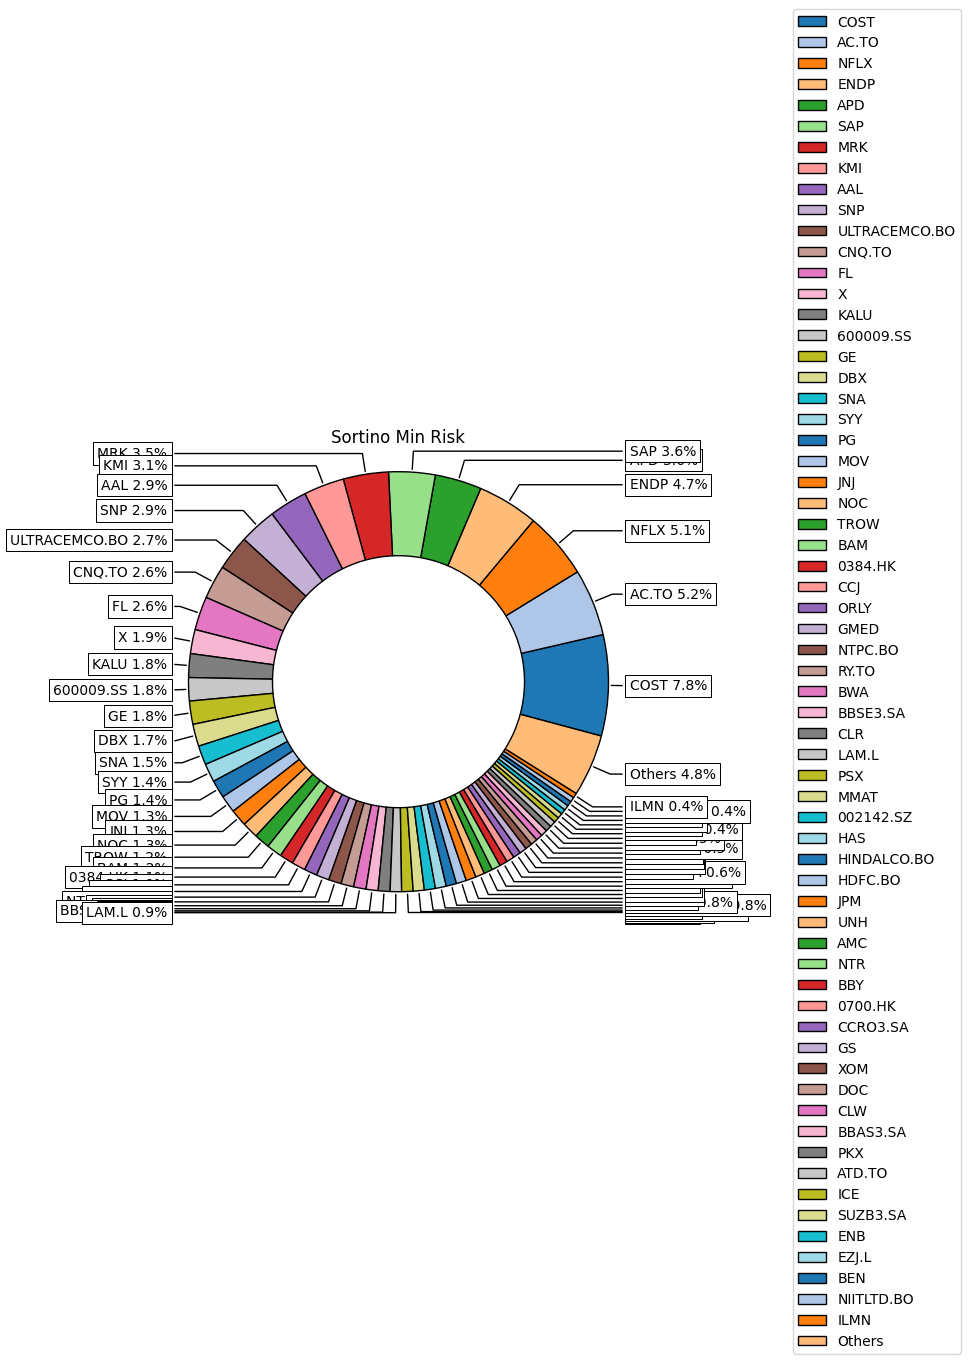

In [5]:
ax = rp.plot_pie(w=allocations, title='Sortino Min Risk', others=0.05, nrow=len(port.assetslist), cmap = "tab20", height=6, width=10, ax=None)

In [6]:
frontier = port.efficient_frontier(rm=risk_measure, points=20, rf=risk_free_rate)
display(frontier.T.head())

,ABT,ABBV,ANF,ACHC,ATVI,ADBE,AMD,AMTX,AFL,AC.TO,...,WTB.L,WSM,WIPRO.BO,000858.SZ,WH,WYN.L,XRX,YESBANK.BO,YUM,ZTO
0,3.417829e-08,2.432920e-08,4.650613e-09,4.867292e-08,1.879033e-08,1.531388e-03,1.067789e-07,1.525834e-07,1.325103e-08,5.151435e-02,...,1.478270e-08,5.778039e-04,1.457142e-08,7.162439e-08,6.789347e-08,2.185161e-09,2.588063e-08,2.076627e-08,2.640280e-08,5.895886e-09
1,1.716737e-08,4.832454e-09,6.540175e-09,7.594147e-09,1.277127e-09,7.264831e-03,1.821193e-08,1.011714e-08,4.868797e-09,3.521620e-04,...,1.617690e-08,5.688218e-08,5.586349e-08,6.974274e-04,3.539861e-08,4.137146e-09,6.621178e-10,8.864071e-09,2.039866e-09,1.131014e-08
2,3.141633e-08,1.673755e-08,1.835249e-08,1.906004e-08,1.427127e-08,4.406412e-03,3.745396e-08,2.666939e-08,1.628564e-08,3.934081e-09,...,1.353014e-08,2.953757e-07,4.013855e-09,2.110321e-08,1.260228e-08,1.674986e-08,2.116258e-10,9.185033e-09,4.688649e-08,5.719093e-08
3,2.895736e-08,1.430458e-08,2.049206e-08,1.555832e-08,1.116787e-08,2.309110e-06,3.093015e-08,1.309506e-08,1.967405e-09,5.712509e-09,...,6.946076e-08,2.799271e-07,4.812357e-08,2.564135e-08,5.557704e-08,1.634393e-08,2.940671e-08,2.628160e-08,6.631902e-08,6.489916e-08
4,1.345856e-08,2.428933e-08,2.555559e-08,2.341107e-08,2.557061e-08,2.463645e-08,1.939483e-08,1.809435e-08,1.527511e-08,2.775845e-08,...,1.301587e-08,1.529310e-07,3.907291e-08,3.243100e-09,1.610941e-08,1.038217e-08,9.651716e-09,6.710522e-09,2.074449e-08,2.347738e-08


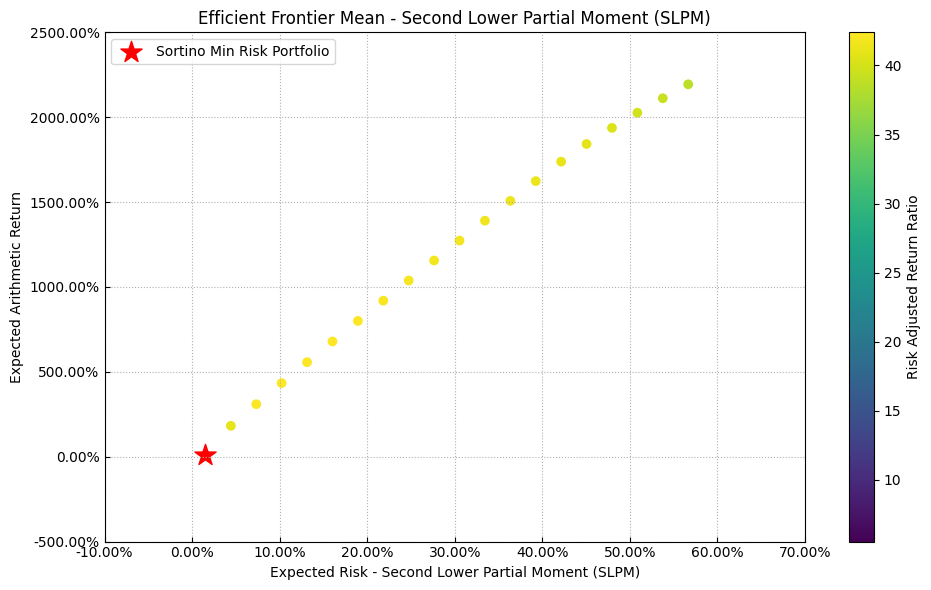

In [7]:
# Plotting the efficient frontier
label = 'Sortino Min Risk Portfolio' # Title of point
mu = port.mu # Expected returns
cov = port.cov # Covariance matrix
returns = port.returns # Returns of the assets

ax = rp.plot_frontier(w_frontier=frontier, mu=mu, cov=cov, returns=returns, rm=risk_measure, alpha=0.05, cmap='viridis', rf=risk_free_rate, w=allocations, label=label, marker='*', s=16, c='r', height=6, width=10, ax=None)

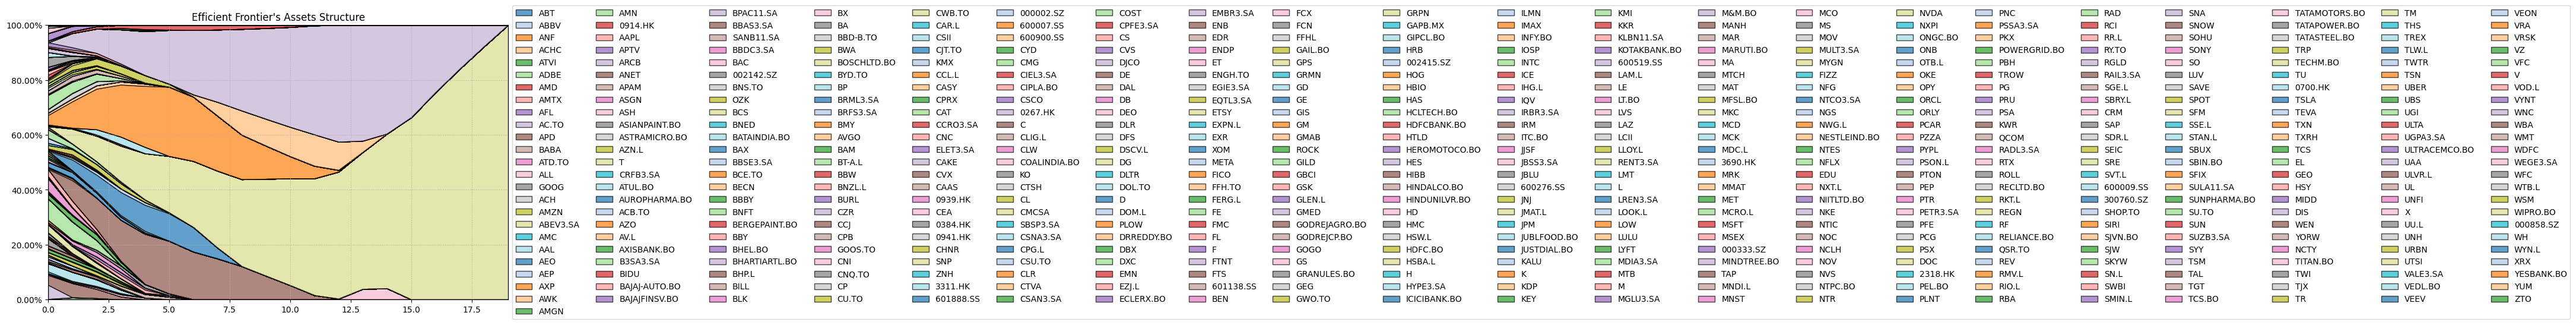

In [8]:
ax = rp.plot_frontier_area(w_frontier=frontier, cmap="tab20", height=6, width=10, ax=None)

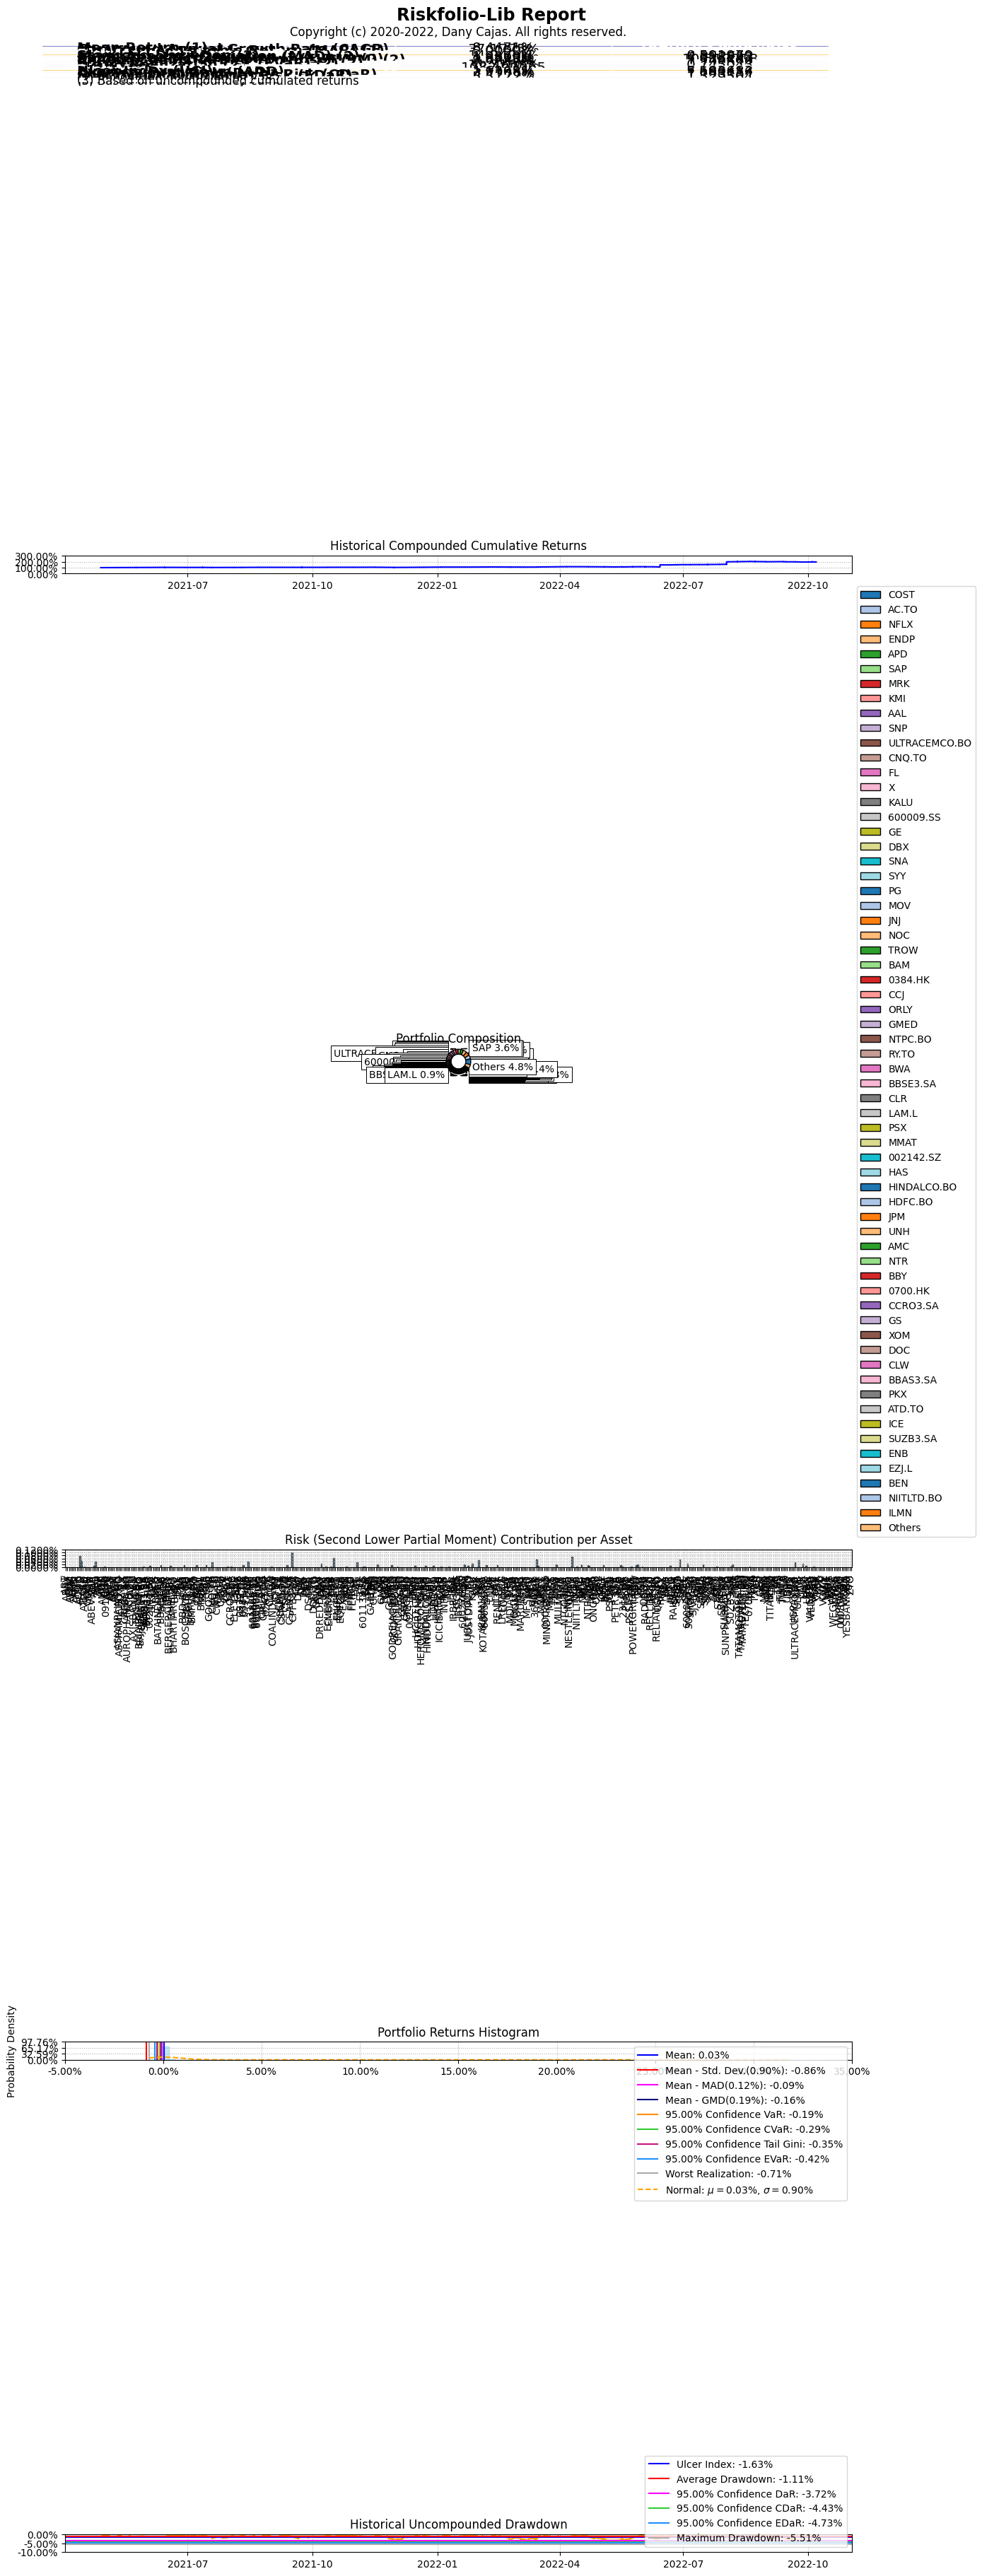

In [16]:
returns.index = returns.index.map(lambda a: pd.to_datetime(a).date())  # remove timezone awareness by converting to dates only
rp.Reports.excel_report(returns, allocations, rf=risk_free_rate, alpha=0.05, t_factor=252, ini_days=1, days_per_year=252, name='permitted_5y_report')
rp.Reports.jupyter_report(returns, allocations, rm=risk_measure, rf=risk_free_rate, alpha=0.05, others=0.05, nrow=len(port.assetslist), height=6, width=14, t_factor=252, ini_days=1, days_per_year=252, bins=100)